In [3]:
from sklearn.metrics import accuracy_score

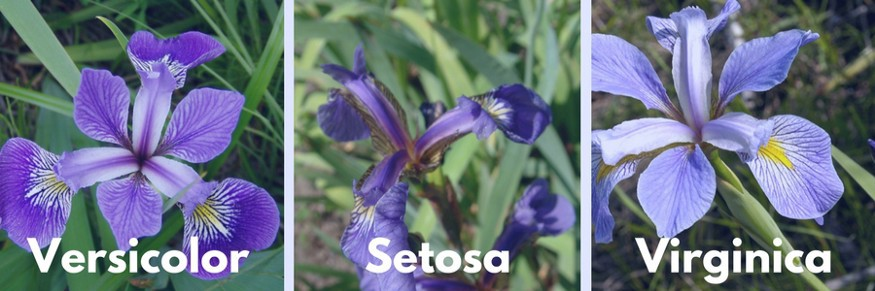

CONTEXTE-->
Nous allons utiliser le jeu de données des plantes d’iris. Cet ensemble de données se compose de quatre champs, à savoir la longueur du sépale, la largeur du sépale, la longueur du pétale et la largeur du pétale. Il contient également une super classe qui contient trois classes différentes, Iris setosa, Iris versicolor et Iris virginica.

In [4]:
import pandas as pd
import numpy as np
import plotly as plt
import sklearn
from sklearn import datasets
import seaborn as sns
import missingno

Définition de Scikit-Learn
Scikit-learn:
Encore appelé sklearn, est la bibliothèque la plus puissante et la plus robuste pour le machine learning en Python. Elle fournit une sélection d’outils efficaces pour l’apprentissage automatique et la modélisation statistique, notamment la classification

##Importation du jeu de données

Comme nous l’avons mentionné précédemment, l’ensemble de données que nous allons utiliser dans cette étude de cas est l’ensemble de données des plantes d’iris. Scikit learn Python est livré avec cet ensemble de données, nous n’avons donc pas besoin de le télécharger depuis une autre source. Nous allons importer l’ensemble de données directement, mais avant cela, nous devons importer Scikit learn et Pandas à l’aide des commandes suivantes :

Pour charger le jeu de données Iris, on utilise la méthode load_iris() du package datasets.

In [5]:
#chargement de base de données iris
iris = datasets.load_iris()

In [153]:
print(iris.DESCR)
#La description complète du jeu de données.

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

##ANALYSE DES FEATURES/INPUTS

In [6]:
df_features = pd.DataFrame(iris.data, columns=iris.feature_names)

In [81]:
df_features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


 vérifions les types de données des champs présents dans le DataFrame.

In [8]:
df_features.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [83]:
df_features.describe

<bound method NDFrame.describe of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0            -0.900681          1.019004          -1.340227         -1.315444
1            -1.143017         -0.131979          -1.340227         -1.315444
2            -1.385353          0.328414          -1.397064         -1.315444
3            -1.506521          0.098217          -1.283389         -1.315444
4            -1.021849          1.249201          -1.340227         -1.315444
..                 ...               ...                ...               ...
145           1.038005         -0.131979           0.819596          1.448832
146           0.553333         -1.282963           0.705921          0.922303
147           0.795669         -0.131979           0.819596          1.053935
148           0.432165          0.788808           0.933271          1.448832
149           0.068662         -0.131979           0.762758          0.790671

[150 rows x 4 columns]>

In [10]:
df_features.isna().sum()
#returns the number of missing values in each column

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [11]:
df_features.shape

(150, 4)

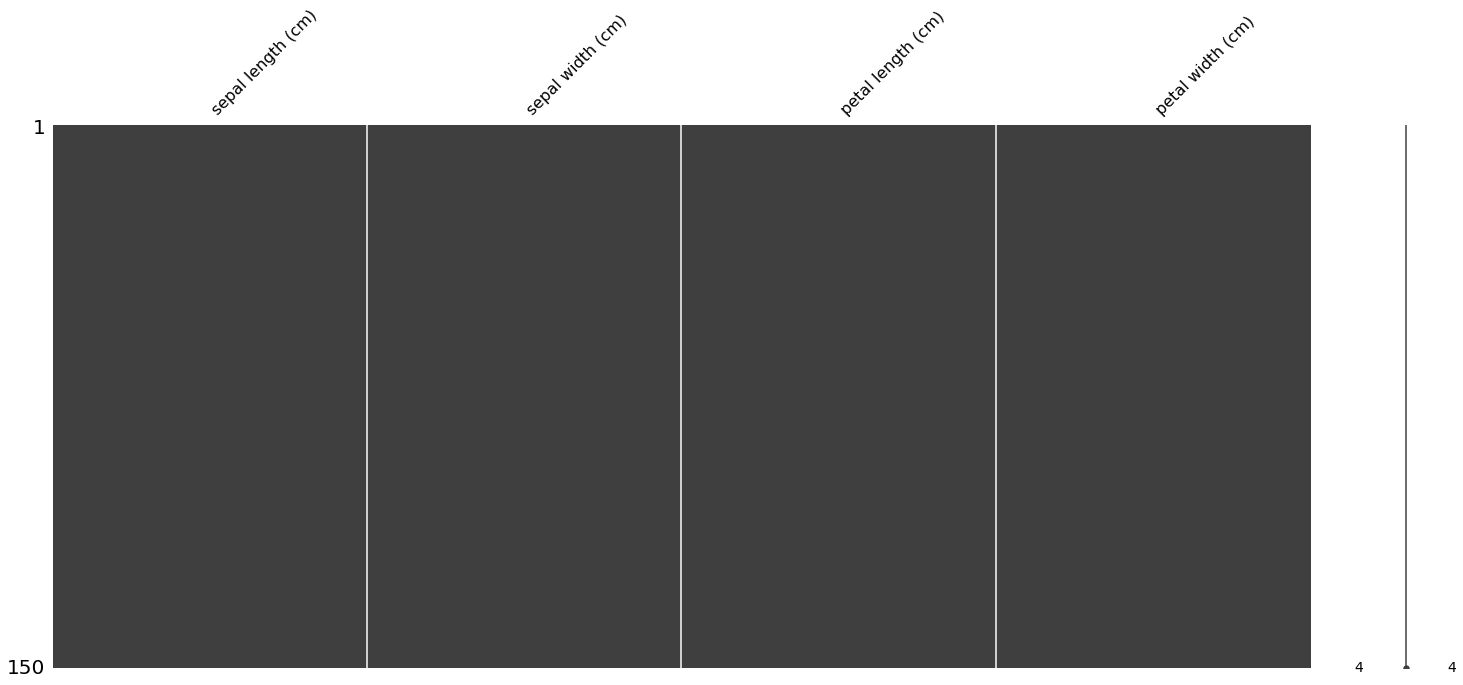

In [12]:
missingno.matrix(df_features)
#Utilisation de la bibliothèque Python missingno pour identifier et visualiser les données manquantes avant l'apprentissage automatique

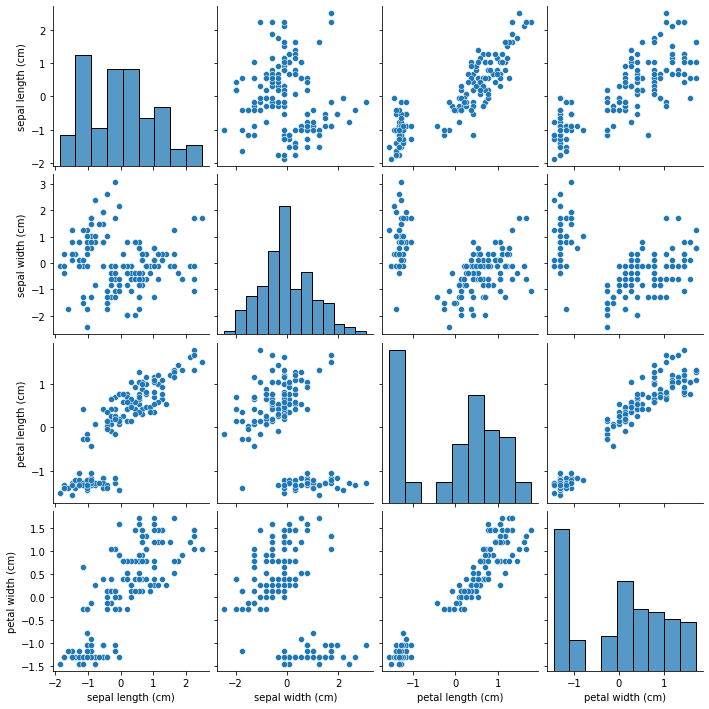

In [154]:
sns.pairplot(df_features)
#Pour tracer plusieurs distributions bivariées par paires dans un ensemble de données

##ANALYSE DES TARGETS

In [13]:
df_target = pd.DataFrame(iris.target, columns = ["Species"])
#df_target.head(100)
display(df_target)

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [14]:
df_target.dtypes

Species    int64
dtype: object

In [15]:
df_target.isna().sum()
#returns the number of missing values in each column

Species    0
dtype: int64

In [16]:
df_target.shape
#dimension de la colonne target

(150, 1)

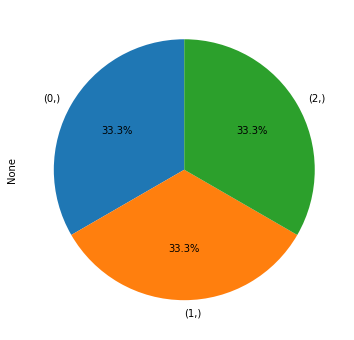

In [17]:
df_target.value_counts().plot.pie(figsize=(6,6), startangle=90, 
                                           autopct='%1.1f%%')

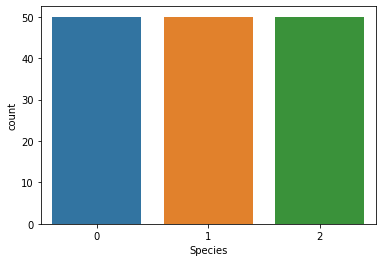

In [18]:
sns.countplot(x = "Species", data = df_target)

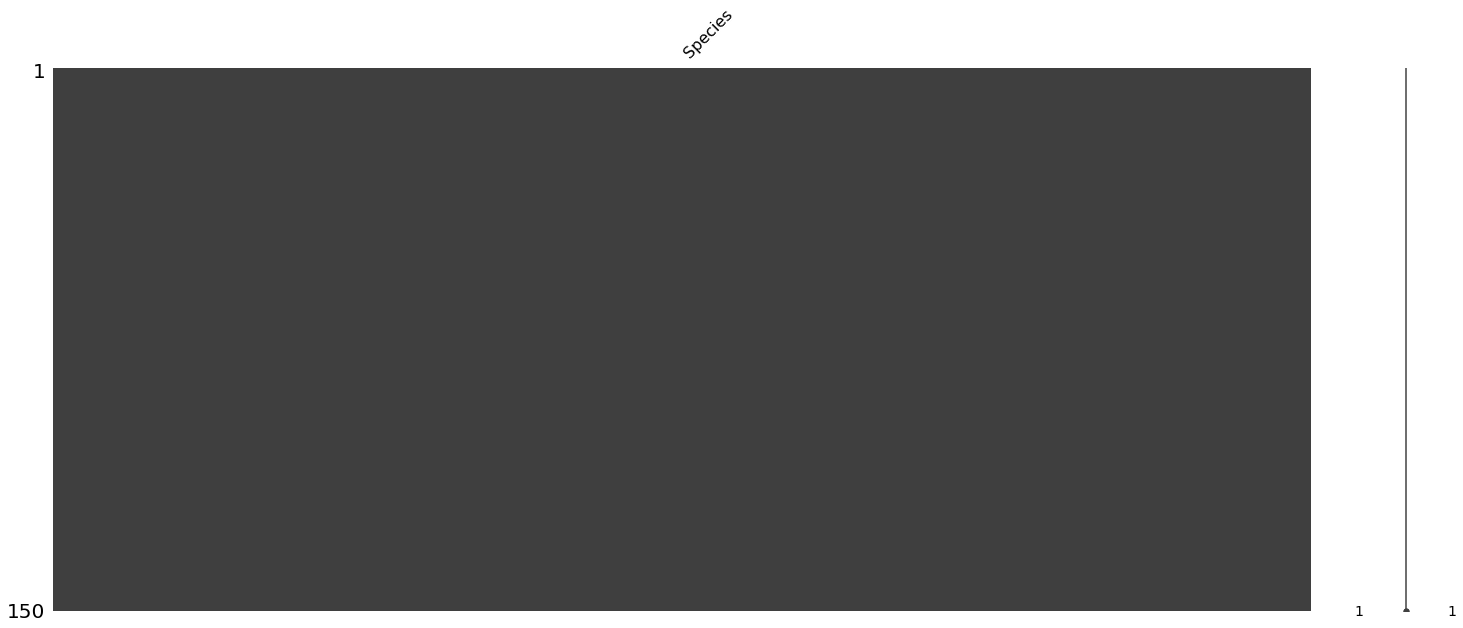

In [19]:
missingno.matrix(df_target)
#Utilisation de la bibliothèque Python missingno pour identifier et visualiser les données manquantes avant l'apprentissage automatique

##MISE A L'ECHELLE DES FEATURES

In [22]:
#the function scale
def scale(x):
  z = (x-(np.mean(x))) / np.std(x)
  return z


#L'échelle standard suppose que les données sont normalement distribuées
# dans chaque entité et les met à l'échelle de sorte que la distribution soit
#centrée autour de 0, avec un écart type de 1.

In [23]:
#Scale our features, except the target.

df_features = scale(df_features)
print(df_features)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0            -0.900681          1.019004          -1.340227         -1.315444
1            -1.143017         -0.131979          -1.340227         -1.315444
2            -1.385353          0.328414          -1.397064         -1.315444
3            -1.506521          0.098217          -1.283389         -1.315444
4            -1.021849          1.249201          -1.340227         -1.315444
..                 ...               ...                ...               ...
145           1.038005         -0.131979           0.819596          1.448832
146           0.553333         -1.282963           0.705921          0.922303
147           0.795669         -0.131979           0.819596          1.053935
148           0.432165          0.788808           0.933271          1.448832
149           0.068662         -0.131979           0.762758          0.790671

[150 rows x 4 columns]


##DATA SPLITTING

In [155]:
# We need to find:   X_train, X_test, Y_train, Y_test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df_features, df_target, 
                                test_size=0.25, random_state=42)

In [156]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((112, 4), (112, 1), (38, 4), (38, 1))

In [160]:
#display(Y_test)

##mise en place de la classification multi-classe

In [234]:
class LogisticRegressionMulti:
  def __init__(self,X_test, Y_test, n_iter, eta,threshold= 0.5, tolerance= 1e-10):
    self.threshold= threshold
    self.tolerance= tolerance
    self.w = None
    self.X_test= X_test
    self.Y_test= Y_test
    self.n_iter = n_iter
    self.eta = eta
    self.loss = np.array([])
    self.cost_history= []
    self.cost_history_test= []



#  def softmax(self, x, w):
#    Z = np.dot (x,w)
#    if Z.ndim ==1:
#      return np.exp(Z)/np.sum(np.exp(Z), axis=0)
#    else:
#       return np.exp(Z)/np.sum(np.exp(Z), axis=1)[:, np.newaxis]
    

  def softmax(self, x,w):
      Z = np.dot (x,w)
      max = np.max(Z, axis=1, keepdims=True)
      e_x = np.exp(Z-max)
      sum = np.sum(e_x, axis=1, keepdims=True)
      f_x = e_x / sum
      return f_x


#valeur minimale.
  def cross_entropy_loss(self, w, x, y):
    #x, y = args
    n = x.shape[0]
    def safe_log(x, minval=0.00000001):
      return np.log(x.clip(min=minval))
    
    p = self.softmax(x, w)
    loss = (-np.sum(y*safe_log(p)))/n 
    return loss

  
  def gradient_cross_entropy_loss(self, w, x, y):
    #x, y = args
    n = x.shape[0]

    p = self.softmax(x, w)
    grad = -(x.T @ (y-p))

    #return grad/len(x)  
    return grad/n


  def fit(self, x, y):
    n = x.shape[0] 
    self.w=  np.ones((x.shape[1], 1))

    for i in range(0,self.n_iter):
      grad = self.gradient_cross_entropy_loss(self.w, x, y)
      self.w -= self.eta * grad
      self.loss = np.append(self.loss, self.cross_entropy_loss(self.w, x, y))
      self.loss_test = np.append(self.loss, self.cross_entropy_loss(self.w, X_test, Y_test))

  
  def predict(self, x):

    return np.argmax(self.softmax(x,self.w), axis=1) # Predict proba with softmax


  def accuracy_score(self, x, y):
    pred = [self.predict(i) for i in x]
    y_ = np.argmax(y, axis=1)
    acc = accuracy_score(y_, pred)
    return acc 


  def plot(self):
    ##### WRITE YOUR CODE HERE #####
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.plot(np.arange(len(self.loss)), self.loss, 'r', linewidth = "2", label= 'Train Loss')
    plt.plot(np.arange(len(self.loss_test)), self.loss_test, 'b', linewidth = "2", label= 'Validation Loss')
    plt.legend()
    plt.show()
    #### END CODE ####

In [235]:
model = LogisticRegressionMulti(X_test, Y_test, n_iter=1000, eta=0.1)

In [236]:
%%time
model.fit(X_train, Y_train)

CPU times: user 3.74 s, sys: 91.9 ms, total: 3.84 s
Wall time: 3.7 s


In [237]:
pred= model.predict(X_test)

In [239]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [240]:
accuracy_score(Y_test,pred)

0.39473684210526316

###CLASSIFICATION AVEC SCIKIT LEARN

## Divide the data into train and test data¶


In [272]:
from sklearn.model_selection import train_test_split

In [273]:
X_train,X_test,y_train,y_test=train_test_split(df_features,df_target,test_size=0.4,random_state=42)

In [274]:
y_train.shape

(90, 1)

###1 Modelling with Logistic Regression without scaling and regularization

In [275]:
from sklearn.linear_model import LogisticRegression

In [276]:
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [277]:
y_pred=lr.predict(X_test)
y_pred
accuracy_score(y_pred,y_test)

0.9833333333333333

In [278]:
print(y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 1 2 1 2 1 2 1 0 2 1 0 0 0 1]


In [279]:
yTrain=lr.predict(X_train)
accuracy_score(yTrain,y_train)

0.9666666666666667

###2Log-loss¶


In [280]:
from sklearn.metrics import log_loss

In [281]:
yprob=lr.predict_proba(X_train)
#yprob

In [282]:
log_loss(y_train,yprob)

0.1761718712703146

In [95]:
class LogisticRegressionMulti:
  def __init__(self,X_test, Y_test, n_iter, eta,threshold= 0.5, tolerance= 1e-10):
    self.threshold= threshold
    self.tolerance= tolerance
    self.w = None
    self.X_test= X_test
    self.Y_test= Y_test
    self.n_iter = n_iter
    self.eta = eta
    self.loss = np.array([])
    self.cost_history= []
    self.cost_history_test= []


#  def softmax(self, a):
#    #Z = np.dot (x,w)
#    #Z = x.dot(w)
#    if a.ndim ==1:
#      return np.exp(a)/np.sum(np.exp(a))
#    else:
#       return np.exp(a)/np.sum(np.exp(a), axis=1)[:, np.newaxis]


  def softmax(self, x, w):
    #x = x.reshape(x.shape[1], x.shape[0])
    #Z = np.dot (x,w)
    #Z = x.dot(w)
    #if x.ndim ==1:
      return np.exp(x.dot(w))/np.sum(np.exp(x.dot(w)))
    #else:
     #  return np.exp(x.dot(w))/np.sum(np.exp(x.dot(w)), axis=1)[:, np.newaxis]
    

##########################################################################################
  def cross_entropy(self, x, y):
    ##### WRITE YOUR CODE HERE ####
    n = x.shape[0]
    y_hat = self.softmax(x, self.w)
    Cost = -np.sum(y * np.log(y_hat) ) /n 
    return Cost
####################################################################################

  def fit(self, x,y):
   
    #y= y.reshape(-1, 1) 

    y_hat = self.softmax(x, self.w)
    #y_hat = self.softmax(a)

    
    #self.y_test= self.y_test.reshape(-1, 1) 

    self.theta=  np.zeros((x.shape[1], 1))           # Initialize theta to zeros vector >>> (x.shape[1])
    ### Completer le code ###
    n = x.shape[0]  
    for i in range (0, self.n_iter) :
      self.theta = self.theta + self.eta * (np.sum(x.T.dot(y - y_hat)))
      self.cost_history.append(self.cross_entropy(x,y))
      self.cost_history_test.append(self.cross_entropy(self.x_test,self.y_test))



##########################################################################################

  #def cross_entropy_loss(self, w, x, y):
    #x, y = args
    #n = x.shape[0]
    #def safe_log(x, minval=0.0000000001):
    #  return np.log(x.clip(min=minval))
    
   # p = self.softmax(x, w)
  #  loss = -np.sum(y*safe_log(p))

    #return loss/len(x) 
 #   return loss/n
    
  
  #def gradient_cross_entropy_loss(self, w, x, y):
    #x, y = args
    #n = x.shape[0]

    #p = self.softmax(x, w)
    #grad = -(x.T @ (y-p))

    #return grad/len(x)  
   # return grad/n


  #def fit(self, x, y):
  #  n = x.shape[0]
    #self.w = np.ones((len(x[0])+1, len(self.Y_test)))  
 #   self.w=  np.zeros((x.shape[1], 1))
#
  #  #x = self.add_ones(x) # Add ones to x
 #   #x = np.hstack([np.ones((len(x),1)), x])
#
   # for i in range(0,self.n_iter):
  #    grad = self.gradient_cross_entropy_loss(self.w, x, y)
 #     self.w -= self.eta * grad
#      self.loss = np.append(self.loss, self.cross_entropy_loss(self.w, x, y))

      #self.cost_history.append(self.cross_entropy_loss(x,y))
      #self.cost_history_test.append(self.cross_entropy_loss(self.X_test,self.Y_test))
  
  def predict(self, x):
    #x = np.hstack([1, x])
    #x= self.add_ones(x)                                                        
     
    #prediction= self.softmax(x, self.w)        # Predict proba with softmax
    #prediction = np.argmax(self.softmax(x, self.w))
    #return prediction

    return np.argmax(self.softmax(x,self.w), axis=0)

  def accuracy_score(self, x, y):
    pred = [self.predict(i) for i in x]
    y_ = np.argmax(y, axis=1)

    acc = accuracy_score(y_, pred)
    return acc

  # property
  #def loss_(self):
   # return self.loss




  def accuracy(self, y_true, y_pred):
    count = 0
    for i in range(0, y_true.shape[0]):

      if(y_true[i] == y_pred[i]):
        count = count + 1
      return (count/y_pred.shape[0]) 

  def accuracy2(self, y_true, y_pred):
    return np.sum(y_true==y_pred)/y_true.shape[0]

In [96]:
model = LogisticRegressionMulti(X_test, Y_test, n_iter=1000, eta=0.001)

In [97]:
%%time
model.fit(X_train, Y_train)

IndexError: ignored

In [ ]:
pred= model.predict(X_test)

In [ ]:
pred